In [1]:
#support vector regressor

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-1.53914502, -0.4386023 ],
       [-0.65544009, -1.14760733],
       [ 1.34347594,  0.44957071],
       ...,
       [ 0.30765205,  0.01166221],
       [ 0.3545886 , -0.56946305],
       [-0.23815508,  0.57714097]])

In [5]:
y

array([-3.17644404e+01, -7.55432033e+01,  3.20151317e+01,  6.66691470e+01,
       -8.21542070e+00, -2.68400850e+01,  9.22701574e+01, -5.14474089e+01,
        2.76224090e+01,  4.33026558e+01, -3.10849636e+01, -3.34301588e+01,
        4.27347154e+01,  7.31213368e-01, -3.88911220e+01,  4.26664460e+01,
        1.22125806e+01, -1.26821581e+02,  4.74015474e+01, -1.08578180e+01,
       -5.24949791e+01, -1.04837118e+02, -2.92174023e+01,  3.47981016e+01,
       -2.40415568e+01,  5.85270100e+01, -1.38646952e+02,  8.65755294e+01,
        7.09862489e+01,  1.03232627e+02, -6.32985836e+01,  1.39536187e+01,
       -4.80743167e+01, -3.34663814e+01,  1.16428343e+01, -1.74067823e+01,
       -8.15472987e+00,  2.69554748e+01,  3.30659109e+01, -1.80436476e+01,
        5.25397828e+01,  2.03023109e+01, -6.91615484e+01,  5.91199081e+01,
       -8.44515529e+01,  5.86621250e+01,  1.59046420e+01, -1.57283661e+02,
        1.12856744e+02,  2.43713213e+01,  6.53694115e+00,  4.42142154e+01,
        8.19424238e+01,  

<AxesSubplot: xlabel='0', ylabel='1'>

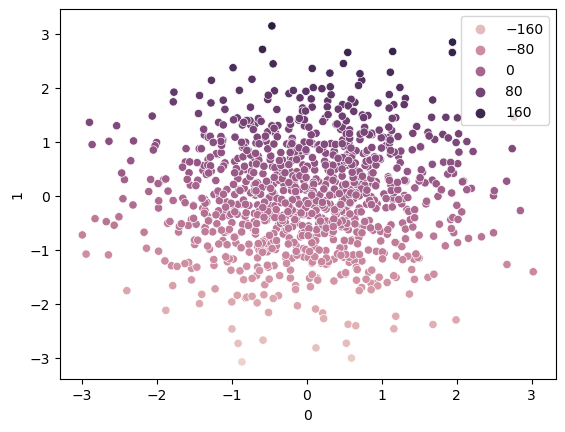

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [8]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [12]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [13]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[ 4.60452068, 60.62783327]])

In [15]:
y_pred = svr.predict(X_test)

In [16]:
y_pred

array([ 1.23419148e+01, -3.03415317e+01, -2.70678635e+01, -2.04266095e+01,
        2.03104097e+01, -7.52765746e+00, -1.33931961e+01, -3.34324622e+01,
       -7.54046908e+01,  2.57293833e+01,  1.72495934e+01, -1.01361008e+02,
        5.60930827e+01, -9.32565715e+01, -1.17405449e+02,  7.42917759e+01,
       -2.86301575e+01,  8.82191597e+01, -7.61495193e+00, -1.13579049e+02,
       -5.30330453e+01, -3.73967547e+01, -4.10153348e+00, -1.18231630e+02,
       -3.03027202e+00, -4.60532003e+01, -4.12495359e+01, -1.01372653e+02,
       -1.17355113e+02,  1.14930888e+02, -4.86849099e+00, -8.57134271e+00,
       -6.02917194e+01, -1.62921388e+02, -9.82423857e+00,  7.07609252e-01,
        7.22773775e-01,  2.19108378e+01,  7.87676283e+01, -1.19392532e+01,
       -7.38553056e+01,  1.51249100e+01,  3.64951156e+01,  4.79840742e+01,
        3.67468261e+01,  3.11171968e+00, -1.09959201e+02,  2.24126333e+01,
        2.95940883e+01, -6.22205584e+01,  4.49220922e+00,  1.41619833e+01,
        6.91294280e+01, -

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9975325248574698

In [18]:
#hyperparamter tuning with svr

from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear'],
         'epsilon': [0.01, 0.1, 0.2, 0.3]}


grid = GridSearchCV(SVR(), param_grid=params, cv = 5, verbose = 3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.910 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.918 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.915 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.910 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.918 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.915 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END C=0.1, epsilon

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
grid.best_score_

0.9975125058572285

In [23]:
y_pred = grid.predict(X_test)

In [24]:
r2_score(y_test, y_pred)

0.9975100753743542